# Step 2 - Identify Salient Features Using $\ell1$-penalty

### Domain and Data

Here I am working with the Madelon data set, a synthetic data set with many variables and a high degree of non-linearity.  From the previous step, benchmark accuracy is 53.6%.  My goal is to use a Lasso regression to determine a reasonable number of salient features to use for the ultimate model, based on the cross-validation accuracy on the training set with various weight parameters.

### Problem Statement

I wish to reduce the number of features in the Madelon data set to better encapsulate the variation in the data set.  I wish to use a Lasso regression to select salient features for an ultimate regression.  The goal is to produce a relevant number of features, which can then be input into a 'SelectKBest' transformation in the full model.  

### Solution Statement

Here I use the same pipeline as in step 1, except that the logistic regression uses L1 regularization with a range of values for the regression weight.  I print the table of number of non-zero results and metrics for each weight, as well as plotting the regression weight against the model accuracy.

In [1]:
from lib.project_5 import load_data_from_database, make_data_dict, general_model, general_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model.logistic import LogisticRegression

data = load_data_from_database(local = True)
data_dict = make_data_dict(data, rand_seed = 742)
data_dict = general_transformer(StandardScaler(), data_dict)
l1_weights = [1,0.5,0.2,0.1,0.05,0.04,0.03,0.02,0.01]
for C in l1_weights:
    lasso_logistic = LogisticRegression(penalty='l1',solver='liblinear',fit_intercept=True,C=C)
    data_dict = general_model(data_dict, lasso_logistic)

In [2]:
import pandas as pd

metrics_by_weight = pd.DataFrame([{data_dict['metrics'][i].iloc[j,0]:data_dict['metrics'][i].iloc[j,1] 
                                   for j in range(5)}
                                  for i in range(len(data_dict['metrics']))])
metrics_by_weight['C'] = pd.Series([data_dict['models'][i].C for i in range(len(data_dict['models']))])
metrics_by_weight['nonzero coefficients'] = \
    pd.Series([data_dict['models'][i].coef_[data_dict['models'][i].coef_ != 0].shape[0]
               for i in range(len(data_dict['models']))])
metrics_by_weight = metrics_by_weight[["C","nonzero coefficients","accuracy","roc_auc","precision","recall","f1"]]
metrics_by_weight

,C,nonzero coefficients,accuracy,roc_auc,precision,recall,f1
0,1.00,467,0.539230,0.541726,0.540085,0.546338,0.542917
1,0.50,442,0.535658,0.546431,0.537004,0.540624,0.538426
2,0.20,361,0.545679,0.558965,0.545483,0.559175,0.552031
3,0.10,265,0.559965,0.576252,0.560544,0.566338,0.563158
4,0.05,117,0.581378,0.611554,0.585887,0.569155,0.576345
5,0.04,81,0.589991,0.626109,0.593270,0.579155,0.584670
6,0.03,30,0.612838,0.638173,0.616319,0.604748,0.608653
7,0.02,8,0.617858,0.630936,0.622175,0.604789,0.611944
8,0.01,2,0.618573,0.625641,0.621832,0.609054,0.613756


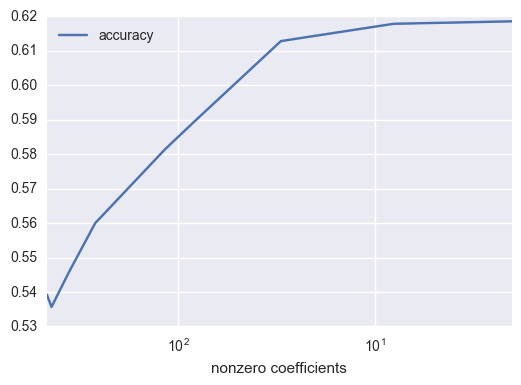

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

metrics_by_weight.plot('nonzero coefficients','accuracy',logx=True)

### Metric

As discussed in step 1, I consider accuracy as the most natural metric to use in this problem.  However, all the scores improve with a decreasing number of features and indicate the same general region for best model score, so which one is used should not substantially change the results.  

### Benchmark

The model accuracy improves as the regression weight 1/C increases and the number of coefficients decreases.  The raw accuracy score was 53.6% for the unregularized model, and becomes around 61.8% for the best of the regularized models.  The other metrics improve as well.  The improvement is most substantial for the initial drop in number of features from 500 to around 30, then more modest with a further reduction in the number of features.  As such, I will use three values for the 'SelectKBest' algorithm in step 3:

kBest = [2, 8, 30]

## Implementation

Implement the following code pipeline using the functions you write in `lib/project_5.py`.

<img src="assets/identify_features.png" width="600px">